"""script to generate subplots showing read depth across each of the four amplicons"""

In [7]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
# use pacbio conda environment


In [8]:
#set matplotlib rc parameters
def set_rc_params():
    #set matplotlib default parameters
    rcParams['xtick.major.width'] = 2
    rcParams['ytick.major.width'] = 2
    rcParams['axes.linewidth'] = 2
    #rcParams['lines.linewidth'] = 2
    #remove top and right lines
    rcParams['axes.spines.top'] = False
    rcParams['axes.spines.right'] = False
    #font size
    fontsize = 14
    rcParams['font.size'] = fontsize
    #for getting the microsoft font Arial working, please follow this guide: https://alexanderlabwhoi.github.io/post/2021-03-missingfont/
    rcParams['font.family'] = 'sans-serif'
    rcParams['font.sans-serif'] = ['Arial']
    #allow font to be edited later in pdf editor
    #make svg text editable
    rcParams['svg.fonttype'] = 'none'
    rcParams ['pdf.fonttype'] = 42 
    #align y-axis top most tick with end of axis
    rcParams['axes.autolimit_mode'] = 'round_numbers'
    #set margins to ensure any error bars fit
    rcParams['axes.xmargin'] = 0.2
    rcParams['axes.ymargin'] = 0.2
    #define bar width
    #bar_width = 0.65
    return fontsize
    

In [9]:
# process data function
def process_data(file):
    df = pd.read_csv(file, header=0)
    # create gene column
    df['gene'] = df['barcode_pair_gene'].str.split('_').str[1]
    # remove nan values
    df = df.dropna()    
    # 
    # bc1017_ARF18_SW346_SW442.trim.fasta
   # print(df)
    return df



In [10]:
# make plot showing read depth for each gene
def plot_read_depth(df, output_location):
    """functrion to plot read depth (count column) for each gene"""
    # plot read depth for each gene

    #df_grouped = df.groupby(['gene'])
    # sort by read depth
    #df_grouped = df_grouped.sort_values(by=['count'], ascending=False)
    # plot
    plt.figure(figsize=(10,10))
    fig = sns.histplot(x='gene',y='count', data=df, )
    #fig = sns.stripplot(x='gene',y='count', data=df)
    plt.xticks(rotation=90)
    plt.xlabel('Amplicon')
    plt.ylabel('Read coverage depth')
    # set y lim to start at 0
    plt.ylim(0)
    #plt.title('Read Depth for Each Gene')
    #save svg and pdf
    plt.savefig(f'{output_location}/read_depth.svg', format='svg', bbox_inches='tight')
    plt.savefig(f'{output_location}/read_depth.pdf', format='pdf', bbox_inches='tight')


    
    #return df_grouped


In [11]:
#main function
def main():
    # file location
    file_loc = '../../data/CRISPR_library/pacbio/demultiplexed/Data_Package_Batch_04_04_2022/CB-PPBFX-994_Sam_Witham_EI_SW_ENQ-5142_A_01_demux_by_gene.csv'
    output_location = '../../data/CRISPR_library'
    # read in and process data 
    df = process_data(file_loc)
    # set matplotlib rc parameters
    fontsize = set_rc_params()

    #m make new folder
    dirName = f'{output_location}/sequencing_plots'
    try:
        # Create target Directory
        os.mkdir(dirName)
        print("Directory " , dirName ,  " created") 
    except FileExistsError:
        print("Directory " , dirName , " already exists")
    # plot data
    plot_read_depth(df,dirName)
    #median read depth for arf9
    arf9_median = df.loc[df['gene'] == 'ARF9']['count'].median()
    print(f'median read depth for ARF9 is {arf9_median}')
    #median read depth for arf18
    arf18_median = df.loc[df['gene'] == 'ARF18']['count'].median()
    print(f'median read depth for ARF18 is {arf18_median}')
    #median read depth for dreb26
    dreb26_median = df.loc[df['gene'] == 'DREB26']['count'].median()
    print(f'median read depth for DREB26 is {dreb26_median}')
    #median read depth for nlp7
    nlp7_median = df.loc[df['gene'] == 'NLP7']['count'].median()
    print(f'median read depth for NLP7 is {nlp7_median}')






    # mean read depth for arf9
    # arf9_mean = df.loc[df['gene'] == 'ARF9']['count'].mean()
    # print(f'ARF9 mean read depth: {arf9_mean}')
    # # mean read depth for arf18
    # arf18_mean = df.loc[df['gene'] == 'ARF18']['count'].mean()
    # print(f'ARF18 mean read depth: {arf18_mean}')
    # # mean read depth for dreb26
    # dreb26_mean = df.loc[df['gene'] == 'DREB26']['count'].mean()
    # print(f'DREB26 mean read depth: {dreb26_mean}')
    # # mean read depth for nlp7
    # nlp7_mean = df.loc[df['gene'] == 'NLP7']['count'].mean()
    # print(f'NLP7 mean read depth: {nlp7_mean}')
    








Directory  ../../data/CRISPR_library/sequencing_plots  already exists
median read depth for ARF9 is 314.5
median read depth for ARF18 is 680.0
median read depth for DREB26 is 342.5
median read depth for NLP7 is 660.0


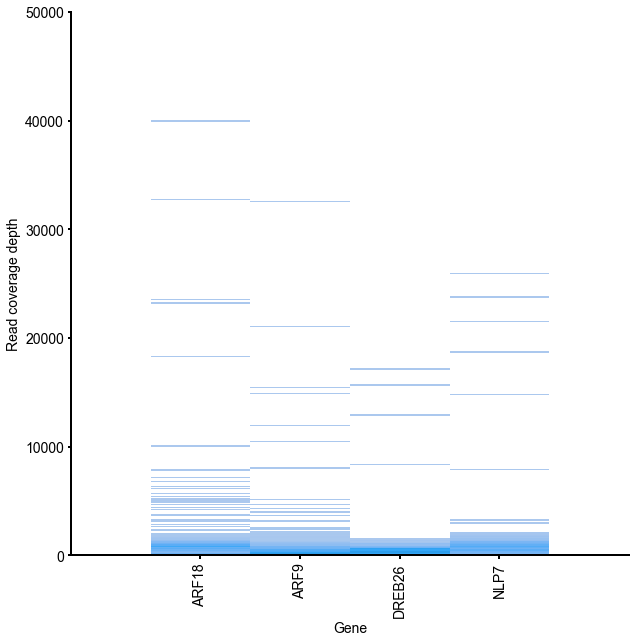

In [12]:
#run main
if __name__ == '__main__':
    main()